In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import math
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Exploratory Data Analysis:

In [120]:
# Reading the dataset :
data= pd.read_csv("energydata_complete.csv")

#### Checking for missing values:

In [121]:
# Function to calculate missing values by column
def missing_values_table(data):
        # Total missing values
        mis_val = data.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [122]:
# Displaying summary of missing data
missing_values_table(data)

Your selected dataframe has 29 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


#### Checking for correlations

In [127]:
pandas_profiling.ProfileReport(df)

Number of variables,28
Number of observations,19735
Total Missing (%),0.0%
Total size in memory,4.2 MiB
Average record size in memory,224.0 B
Numeric,25
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,3


#### Finding best correlated variables

In [15]:
df = data
df.drop(['date','Appliances', 'T9', 'rv2', 'T_out'], axis=1).apply(lambda x: x.corr(df.Appliances)).sort_values(ascending=False)

lights         0.197278
T2             0.120073
T6             0.117638
Windspeed      0.087122
RH_1           0.086031
T3             0.085060
T1             0.055447
T4             0.040281
T8             0.039572
RH_3           0.036292
T7             0.025801
T5             0.019760
RH_4           0.016965
Tdewpoint      0.015353
RH_5           0.006955
Visibility     0.000230
rv1           -0.011145
Press_mm_hg   -0.034885
RH_9          -0.051462
RH_7          -0.055642
RH_2          -0.060465
RH_6          -0.083178
RH_8          -0.094039
RH_out        -0.152282
dtype: float64

### Implementing Gradient Descent for Linear Regression

In [128]:
def initialize_parameters (lenw):
    w = np.random.randn(1,lenw)
    b = 0
    return w,b

In [129]:
def forward_prop(X, w, b): # w --> 1xn ; X--> n x m
    z = np.dot(w,X) + b # z --> 1xm
    return z

In [130]:
def cost_func(z, y):
    m = y.shape[1]
    J = (1/(2*m) * np.sum(np.square(z-y)))
    return J

In [131]:
def back_prop(X, y, z):
    m = y.shape[1]
    dz = (1/m) * (z-y)
    dw = np.dot(dz, X.T)
    db = np.sum(dz)
    return dw,db 

In [132]:
def batch_grad_up(w, b, dw, db, learning_rate):
    w = w - (learning_rate * dw)
    b = b - (learning_rate * db)
    return w,b

### PART 1

In [136]:
def linear_regression_model(X_train, y_train, x_val, y_val, learning_rate, epochs):
    lenw = X_train.shape[0]
    w, b = initialize_parameters(lenw)
    
    costs_train = []
    i = 0
    cost_val = 0
    RMSE_train = 0
    RMSE_val = 0
    m_train = y_train.shape[1]
    m_val = y_val.shape[1]
    #converged = False # Comment
    
    for i in range(1,epochs+1):
        
        z_train = forward_prop(X_train, w, b)
        cost_train = cost_func(z_train, y_train)
        dw, db = back_prop(X_train, y_train, z_train)
        w, b = batch_grad_up(w, b, dw, db, learning_rate)
        
        #Store training cost in a list:
        costs_train.append(cost_train)
        #RMSE train:
        RMSE_train = (1/m_train) * np.sum(np.square(z_train - y_train))
    # Cost, val
    z_val = forward_prop(X_val, w, b)
    #cost_val = cost_func(z_val, y_val)
    RMSE_val = (1/m_val) * np.sum(np.square(z_val - y_val))
    #linear_accuracy = metrics.accuracy_score(y_val, z_val)
        
    #print out cost_train, cost_val, MAE_train, MAE_val
    print('Thetas: ' + ' ' +str(w))
    print('Bias: ' + ' ' +str(b))
    print('Epochs: ' + ' ' +str(epochs))
    print('Learning Rate: ' + ' ' +str(learning_rate))
    print('Training cost '+' ' +str(costs_train[-1])+ ' ' + ' Validation cost '+' ' +str(cost_val)+ ': ')
    #print('RMSE trainig cost: '+' ' +str(costs_train[-1])+ '' + ' RMSE Validation cost: '+ ' ' +str(cost_val)+ ': ')
    #print('Accuracy ' + ' ' +str(linear_accuracy))
    print(len(costs_train))
    plt.plot(costs_train, label= 'e')
    plt.xlabel('Iterations')
    plt.ylabel('Training cost')
    plt.title('Learning rate '+ str(learning_rate))
    plt.show()   

In [137]:
# Step 1 - 
data= pd.read_csv("energydata_complete.csv")
X = data.drop(['date','Appliances'], axis=1) # We are excluding date column for simplicity of the model
y = data['Appliances'].values

# Partition the dataset in train + validation sets
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 5)

X_train = X_train.T

y_train = np.array([y_train])
X_val = X_val.T
y_val = np.array([y_val])

Thetas:  [[3.57114283 6.53032113 6.36006396 4.98678523 7.38871341 6.49175478
  6.49584305 7.11803081 7.18021589 4.17387597 4.77456791 6.69361537
  5.63414956 5.78927793 3.89727472 7.50217267 5.30534754 6.81152864
  6.08560272 5.27921289 9.85645085 9.29721222 6.42182425 7.25653506
  4.7581911  7.7633514  4.7824516 ]]
Bias:  15.104912574507729
Epochs:  10000
Learning Rate:  0.0001
Training cost  5193.88743291489  Validation cost  0: 
10000


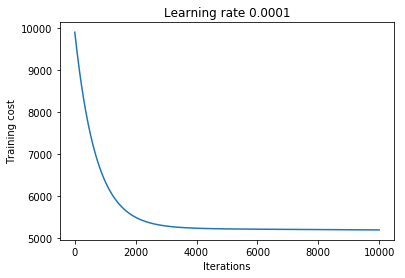

Thetas:  [[ 7.10074987  9.15354808  6.95623654  6.96810925  7.41154713  7.70275213
   8.19168966  7.35257756  5.09879522  4.32838816  4.16976912  8.51301893
   3.80863299  5.36578571  0.73599645  8.38760436  1.86486368  4.83457252
   3.50326053  8.58749604  9.83911903  5.19195746  9.35472116 10.89880875
   3.07083218  5.85833162  5.98841073]]
Bias:  17.666565683361938
Epochs:  25000
Learning Rate:  0.0001
Training cost  5133.537923994489  Validation cost  0: 
25000


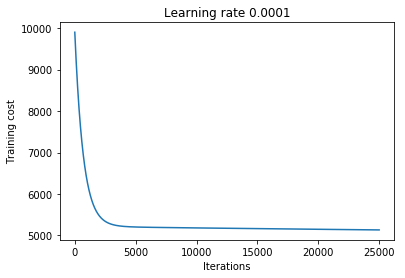

Thetas:  [[ 20.8982676    8.39521975  13.54384006  14.5234757    4.52492908
   11.46511499  13.23162458   6.37698162   7.17089676  -0.32142258
    8.12925329  16.76936549   4.51316298   1.88609139  -9.37587974
    9.5059528  -13.73250741   0.02356442  -2.22255512  12.73843315
   12.45042979  -3.42205931  18.85737303  14.26879406  -3.04445671
    2.87009666   4.13334396]]
Bias:  28.430478629556152
Epochs:  10000
Learning Rate:  0.001
Training cost  4971.393299269478  Validation cost  0: 
10000


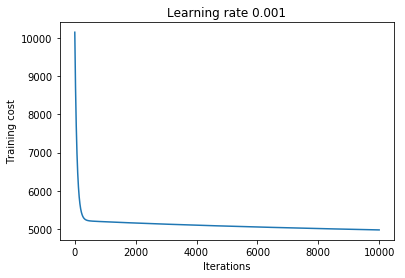

Thetas:  [[ 49.20648566   7.01340554  26.57846341  22.33497202   3.3095592
   18.03189882  23.04600793   1.65833693   8.88561276  -8.49792349
   11.89887971  25.71849322   6.01900581   0.0959072  -21.02472872
   13.19730684 -28.51185104 -12.94744464 -12.56217912  17.06425194
   12.46518707 -14.47817736  32.67367305  16.54955782  -8.13269346
    0.22177826   2.49888449]]
Bias:  41.120358283767075
Epochs:  25000
Learning Rate:  0.001
Training cost  4799.6723984272185  Validation cost  0: 
25000


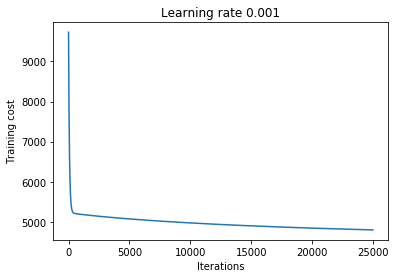

Thetas:  [[115.52663997  -2.28064278  77.65348002  36.95921203   7.39604578
   66.78764679  59.25305564 -14.11380071  19.67156426 -28.01543967
   15.15205602  46.87363203   7.40905029 -13.15693631 -50.70921578
   26.36593633 -74.0951133  -36.33898967 -29.93794406  14.20443444
   -3.05739308 -25.36603819  34.12944464  11.07397095 -23.25508902
    0.57717414  -1.32100497]]
Bias:  62.77306655615034
Epochs:  10000
Learning Rate:  0.01
Training cost  4545.402265740268  Validation cost  0: 
10000


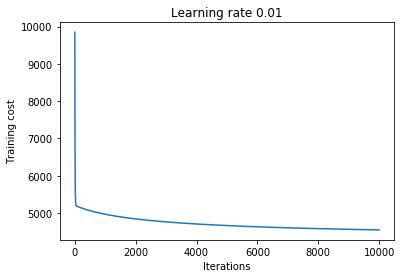

Thetas:  [[ 142.92111812  -26.93807167  138.79052402   42.09386039   -8.11059211
   138.30389676   87.61059523  -38.88361563   19.03297453  -47.21792437
     9.92454595   66.03823117    4.15273863  -13.34365141  -65.2054304
    41.2984159  -104.04758547  -57.05255613  -37.13603178    1.2714844
    -8.29907357  -19.16973505   23.66602706    8.53234579  -31.87475131
    -1.50090256    0.17859507]]
Bias:  70.07644850312471
Epochs:  25000
Learning Rate:  0.01
Training cost  4437.87279791371  Validation cost  0: 
25000


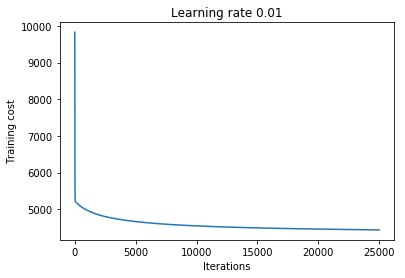

In [138]:
Learnig_rate_list = [0.0001,0.001, 0.01]
epochs = [10000, 25000]

for lr in Learnig_rate_list:
    for ep in epochs:
        linear_regression_model(X_train, y_train, X_val, y_val, lr, ep)

### PART 2

In [165]:
def linear_regression_model(X_train, y_train, x_val, y_val, learning_rate, epochs):
    lenw = X_train.shape[0]
    w, b = initialize_parameters(lenw)
    
    #costs_train = []
    costs_train = [10000] # Comment it
    i = 0
    cost_val = 0
    RMSE_train = 0
    RMSE_val = 0
    m_train = y_train.shape[1]
    m_val = y_val.shape[1]
    converged = False # Comment
    
    #for i in range(1,epochs+1):
    
    #while (i > 2 and costs_train[i-1] - costs_train[i-2] < math.e(epochs)):
    while converged == False :
        z_train = forward_prop(X_train, w, b)
        cost_train = cost_func(z_train, y_train)
        dw, db = back_prop(X_train, y_train, z_train)
        w, b = batch_grad_up(w, b, dw, db, learning_rate)
        
        #Store training cost in a list:
        #if i%10 == 0:
        costs_train.append(cost_train)
        #RMSE train:
        #RMSE_train = (1/m_train) * np.sum(np.square(z_train - y_train))
        i+=1
        #print(i)
        #if ((i>0 and (np.abs(costs_train[i-1] - costs_train[i]) < 1e-6))  or (i > 15000 and i < 15002)):#Comment it
        #if ((i>0 and (np.abs(costs_train[i-1] - costs_train[i]) < 1e-4))):
        if ((i>0 and (np.abs(costs_train[i-1] - costs_train[i]) < 1*math.exp(epochs)))):
            converged = True # Comment
    # Cost, val
    z_val = forward_prop(X_val, w, b)
    cost_val = cost_func(z_val, y_val)
    print('Thetas: ' + ' ' +str(w))
    print('Bias: ' + ' ' +str(b))
    print('Epochs: ' + ' ' +str(epochs))
    print('Learning Rate: ' + ' ' +str(learning_rate))
    #print('Training cost '+' ' +str(costs_train[-1])+ ' ' + ' Validation cost '+' ' +str(cost_val)+ ': ')
    print('RMSE trainig cost: '+' ' +str(costs_train[-1])+ '' + ' RMSE Validation cost: '+ ' ' +str(cost_val)+ ': ')
    #print('Accuracy ' + ' ' +str(linear_accuracy))
    print(len(costs_train))
    plt.plot(costs_train, label= 'e')
    plt.xlabel('Iterations')
    plt.ylabel('Training cost')
    plt.title('Learning rate '+ str(learning_rate))
    plt.show()   

In [152]:
# Step 1 - 
data= pd.read_csv("energydata_complete.csv")
X = data.drop(['date','Appliances'], axis=1) # We are excluding date column for simplicity of the model
y = data['Appliances'].values

# Partition the dataset in train + validation sets
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 5)

X_train = X_train.T

y_train = np.array([y_train])
X_val = X_val.T
y_val = np.array([y_val])

Thetas:  [[ 97.45337997   3.82872565  60.05292713  32.73612442   5.94138318
   46.81978481  47.03888013  -7.68287894  16.27818645 -23.37805622
   15.54649434  40.33276819   7.74295812  -9.81175263 -41.33387859
   21.3707619  -59.92137735 -28.65335919 -25.99921191  18.31957458
    1.67269124 -23.98868025  37.6428507   12.81986033 -19.95105711
   -0.49771887   0.20017471]]
Bias:  57.726244628312486
Epochs:  -6
Learning Rate:  0.001
RMSE trainig cost:  4604.754156852256 RMSE Validation cost:  5060.024946434032: 
68958


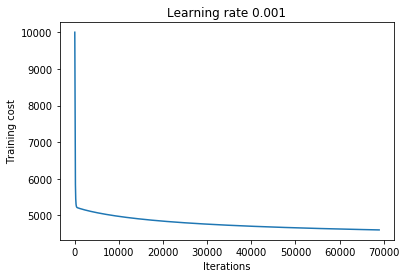

Thetas:  [[ 56.22730403   8.45156602  29.23611257  23.9993573    5.50089691
   21.41468364  26.69631188  -0.64727182   9.92185902 -10.20299426
   13.66217287  29.15574987   6.18562056  -4.39754805 -24.16535368
   14.21672648 -33.54429342 -13.77242778 -13.97013018  17.60881749
   11.25083688 -17.23054565  33.86669235  16.14827613 -11.55726495
    0.87009099   1.12880724]]
Bias:  44.20450330347154
Epochs:  -5
Learning Rate:  0.001
RMSE trainig cost:  4763.748152349101 RMSE Validation cost:  5228.754173740687: 
29571


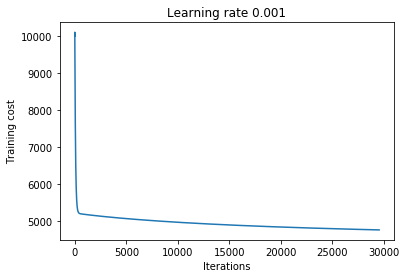

Thetas:  [[19.10894618  9.01493601 10.16871979 12.09571649  5.36442046  9.48984449
  11.56925407  5.86221818  6.8232769   0.57824957  8.57794761 14.87799435
   4.33875265  4.27178915 -6.06872492 10.99552839 -8.95886607  0.30676304
  -1.25633519 11.37143284 13.84255957 -4.67029442 17.80765502 13.41657356
  -1.36888902  3.83460555  3.89887771]]
Bias:  26.195668248836384
Epochs:  -4
Learning Rate:  0.001
RMSE trainig cost:  5000.783798980061 RMSE Validation cost:  5475.734534629718: 
8565


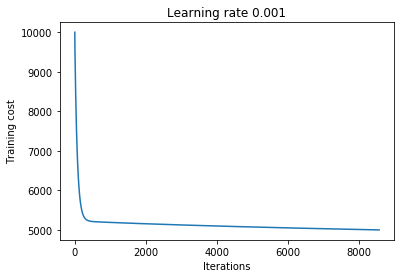

Thetas:  [[ 144.9768061   -39.54881306  164.13366883   42.2812632   -22.50895993
   170.37211559   94.20153353  -48.45650262   12.8323074   -51.64403912
     9.87916909   74.98455604    4.58149892  -11.29590128  -65.10831934
    48.37734164 -112.27208812  -67.51799706  -37.49820051   -6.69700579
    -6.99600897  -15.63653455   22.85962251    8.51525527  -33.66432825
    -0.7304879    -0.62449182]]
Bias:  69.6327058572233
Epochs:  -6
Learning Rate:  0.01
RMSE trainig cost:  4409.407457280526 RMSE Validation cost:  4839.519988113942: 
34007


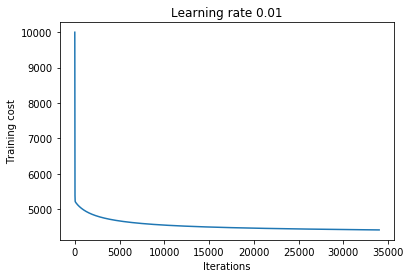

Thetas:  [[ 1.35266950e+02 -1.38916336e+01  1.10560673e+02  4.18752204e+01
   2.70540255e+00  1.03101194e+02  7.48700537e+01 -2.87244704e+01
   2.20344801e+01 -3.92174102e+01  1.14871427e+01  5.62759210e+01
   5.54233191e+00 -1.47065867e+01 -5.92844074e+01  3.43946326e+01
  -9.26138091e+01 -4.62168172e+01 -3.57964578e+01  9.54478952e+00
  -7.48820456e+00 -2.24277891e+01  2.71565789e+01  8.98146325e+00
  -2.93672636e+01 -1.30239352e+00  1.27461108e-01]]
Bias:  68.44833739519558
Epochs:  -5
Learning Rate:  0.01
RMSE trainig cost:  4478.536365128801 RMSE Validation cost:  4918.845110519282: 
16786


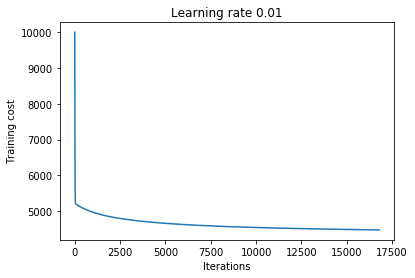

Thetas:  [[108.54273098   0.51344226  69.68615134  36.58092551   6.87688153
   56.86742673  54.22199167 -12.61363024  18.93268735 -27.36626267
   15.76926964  42.37090634   7.75953911 -11.5391979  -45.72958736
   24.10419712 -68.78202455 -30.27072144 -28.82345464  17.52953644
   -1.16807661 -25.17577492  35.74683656  11.81662702 -22.84053777
   -0.24142712  -0.35690932]]
Bias:  60.994243464176584
Epochs:  -4
Learning Rate:  0.01
RMSE trainig cost:  4569.53775558923 RMSE Validation cost:  5021.863129769982: 
8634


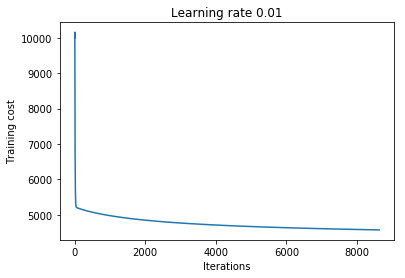

In [153]:
Learnig_rate_list = [0.001, 0.01]

epsilon_list = [-6, -5, -4]

for lr in Learnig_rate_list:
    for ep in epsilon_list:
        linear_regression_model(X_train, y_train, X_val, y_val, lr, ep)

### PART 3

In [155]:
# PART - 3:

# Step 1 - 
data= pd.read_csv("energydata_complete.csv")
X = data[['RH_4','RH_out','Visibility', 'T_out', 'T8', 'lights', 'T9', 'Press_mm_hg', 'RH_7','Windspeed']]
y = data['Appliances'].values

# Partition the dataset in train + validation sets
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 5)

X_train = X_train.T

y_train = np.array([y_train])
X_val = X_val.T
y_val = np.array([y_val])

Thetas:  [[ 25.01277488 -32.4563353   16.26859117  35.43972693  27.30810343
   87.23787116 -10.71840725   8.53769236 -31.80696058  42.82460109]]
Bias:  66.94781114225664
Epochs:  -6
Learning Rate:  0.001
RMSE trainig cost:  4828.818591916963 RMSE Validation cost:  5298.563328323284: 
50086


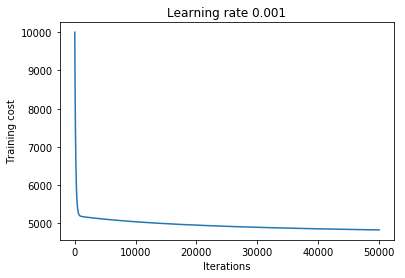

Thetas:  [[ 16.40365775 -13.88608557  17.14775605  27.66967946  24.5702442
   44.06401651   3.20409506  15.00716052 -12.41740972  33.70074033]]
Bias:  47.28269494299903
Epochs:  -5
Learning Rate:  0.001
RMSE trainig cost:  4949.112373114833 RMSE Validation cost:  5423.723947187553: 
20531


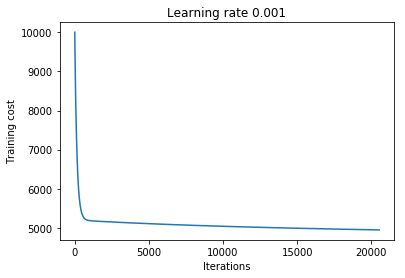

Thetas:  [[13.35882663 12.97837462 16.75535414 14.51569819 16.97165444  7.47049179
  13.67259154 17.85977533  7.99210306 13.32410237]]
Bias:  30.540395283758787
Epochs:  -4
Learning Rate:  0.001
RMSE trainig cost:  5149.748820075172 RMSE Validation cost:  5627.098472880358: 
2617


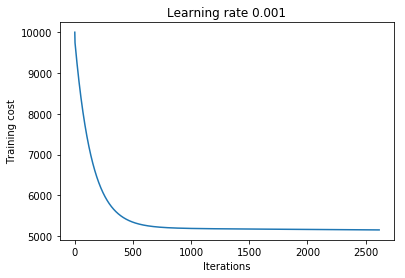

Thetas:  [[ 55.21808571 -51.40095266   8.16820798  41.09344663  39.50296026
  152.99539895 -36.70678785 -11.53738211 -68.12512374  30.56741827]]
Bias:  102.87047145609993
Epochs:  -6
Learning Rate:  0.01
RMSE trainig cost:  4730.2023987593875 RMSE Validation cost:  5192.712105730211: 
16287


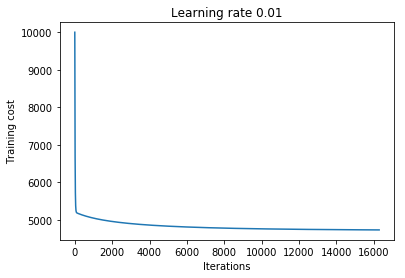

Thetas:  [[ 41.21871151 -44.8202904   11.1737548   39.67479947  35.37388796
  133.15097355 -27.77796308  -3.56340279 -53.67811727  38.50987161]]
Bias:  89.13268436267951
Epochs:  -5
Learning Rate:  0.01
RMSE trainig cost:  4753.48717543095 RMSE Validation cost:  5218.731490706656: 
10671


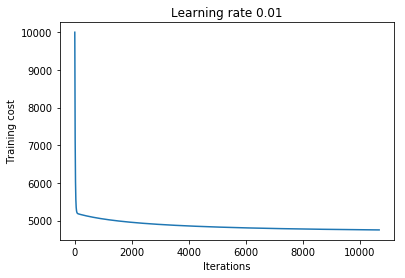

Thetas:  [[ 28.57407847 -36.40289256  14.76552349  36.96647666  30.74118576
   99.07110457 -16.89738351   5.77804687 -37.1243419   42.95525149]]
Bias:  72.89374369375777
Epochs:  -4
Learning Rate:  0.01
RMSE trainig cost:  4804.052000836633 RMSE Validation cost:  5273.07765625291: 
6173


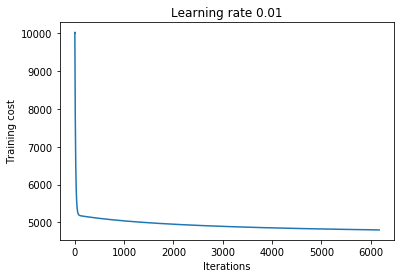

In [156]:
Learnig_rate_list = [0.001, 0.01]

epsilon_list = [-6, -5, -4]

for lr in Learnig_rate_list:
    for ep in epsilon_list:
        linear_regression_model(X_train, y_train, X_val, y_val, lr, ep)

### PART 4

In [166]:
# PART - 4:

# Step 1 - 
data= pd.read_csv("energydata_complete.csv")
X = data[["T2",
"T6",
"RH_3",
"Windspeed",
"RH_1",
"T3",
"T1",
"T4",
"T8",
"lights"
]]
y = data['Appliances'].values

# Partition the dataset in train + validation sets
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 5)

X_train = X_train.T

y_train = np.array([y_train])
X_val = X_val.T
y_val = np.array([y_val])

Thetas:  [[22.53165315 28.74747095  9.56544185 35.67863537 18.36798754 14.13136499
  -0.55692216 -8.53941265 10.26887486 74.2205733 ]]
Bias:  45.966349763797645
Epochs:  -6
Learning Rate:  0.001
RMSE trainig cost:  4890.674780695846 RMSE Validation cost:  5355.296456455387: 
40919


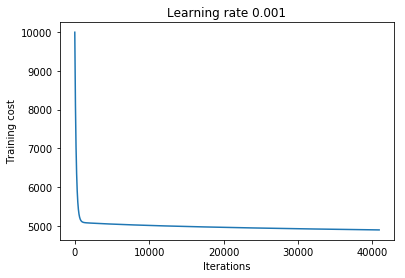

Thetas:  [[12.68675292 16.2734927  19.2172787  22.04629212 15.63640073 11.49590717
  11.99140812 10.60914066 14.09638205 19.69470228]]
Bias:  39.67965567815383
Epochs:  -5
Learning Rate:  0.001
RMSE trainig cost:  5019.532135115215 RMSE Validation cost:  5490.924729941402: 
8198


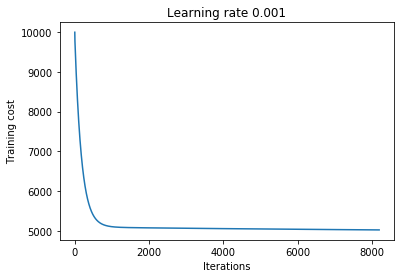

Thetas:  [[11.82440756 15.95841124 18.01025306 12.01037595 11.94340842 14.54314876
  17.88099974 16.04708816 16.41673485  3.49833751]]
Bias:  35.56736524959349
Epochs:  -4
Learning Rate:  0.001
RMSE trainig cost:  5084.566714557336 RMSE Validation cost:  5562.152014291425: 
1494


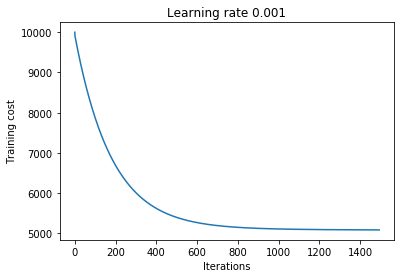

Thetas:  [[ 70.55750382  44.77853984 -39.4331261   32.49340194  41.89851439
   65.47382883 -53.85369221 -74.14309093  26.43234397 178.79293143]]
Bias:  66.80021509171979
Epochs:  -6
Learning Rate:  0.01
RMSE trainig cost:  4733.492330776236 RMSE Validation cost:  5189.5596645435735: 
24293


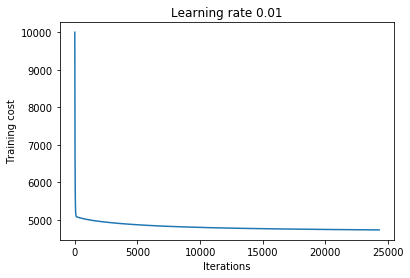

Thetas:  [[ 46.78163295  41.1933232  -17.76755789  36.90258208  28.63770216
   35.86676576 -25.99922416 -40.97148686  17.62980565 143.83466832]]
Bias:  55.876987434015
Epochs:  -5
Learning Rate:  0.01
RMSE trainig cost:  4780.9773649363815 RMSE Validation cost:  5239.840216899581: 
12362


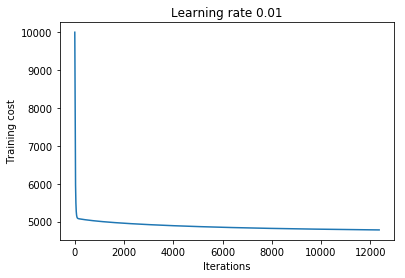

Thetas:  [[ 28.57678578  32.87909823   2.7535743   37.062017    20.93955714
   19.37677314  -7.62071872 -15.60931781  10.96019627  92.78854788]]
Bias:  48.14648615712918
Epochs:  -4
Learning Rate:  0.01
RMSE trainig cost:  4855.6191851075455 RMSE Validation cost:  5318.251186107888: 
5690


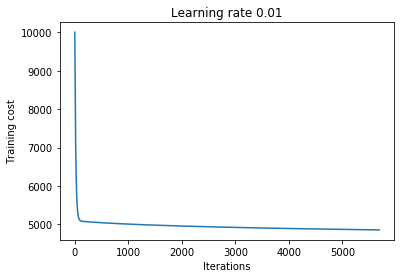

In [167]:
Learnig_rate_list = [0.001, 0.01]

epsilon_list = [-6, -5, -4]

for lr in Learnig_rate_list:
    for ep in epsilon_list:
        linear_regression_model(X_train, y_train, X_val, y_val, lr, ep)

### Logistic Regression

#### PART 1

0.0001 10000
Accuracy :0.7890149979732468



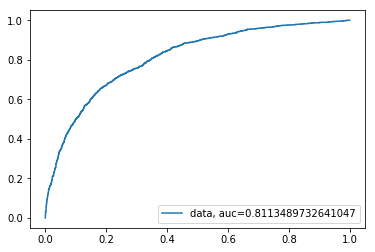

0.0001 25000
Accuracy :0.7890149979732468



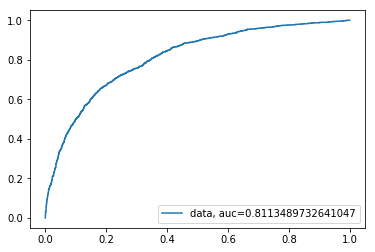

0.001 10000
Accuracy :0.7886096473449534



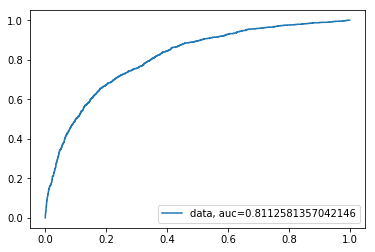

0.001 25000
Accuracy :0.7886096473449534



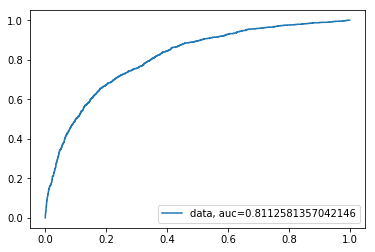

0.01 10000
Accuracy :0.7894203486015403



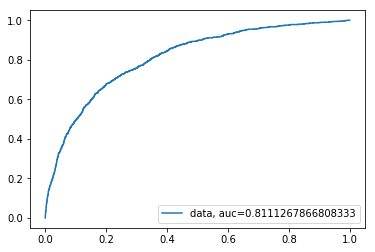

0.01 25000
Accuracy :0.7894203486015403



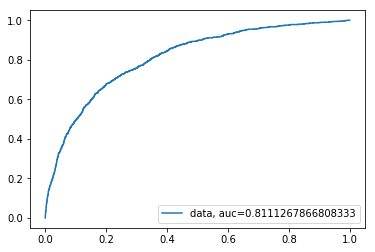

In [160]:
# Step 1 - 
data= pd.read_csv("energydata_complete.csv")
X = data.drop(['Appliances','date'], axis=1)
y = data['Appliances']


tol = [0.0001, 0.001, 0.01]
max_iter = [10000, 25000]


y_threshold = np.mean(y)
j = 0
y_logy = np.zeros((y.shape[0], 1))

for i in y:
    if i < y_threshold:
        y_logy[j] = 0
    else:
        y_logy[j] = 1
        
    j+=1    
        

# Partition the dataset in train + validation sets
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y_logy, test_size = 0.25, random_state = 5)

from sklearn.linear_model import LogisticRegression


for tl in tol:
    for itr in max_iter:
        logisticRegr = LogisticRegression(tol = tl, max_iter = itr)
        print(logisticRegr.tol, logisticRegr.max_iter)
        logisticRegr.fit(X_train, y_train) 
        predictions = logisticRegr.predict(X_val) 
        score = logisticRegr.score(X_val, y_val)
        print("Accuracy :" + str(score) + "\n")
        y_pred_proba = logisticRegr.predict_proba(X_val)[::,1]
        fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_proba)
        auc = metrics.roc_auc_score(y_val, y_pred_proba)
        plt.plot(fpr,tpr,label="data, auc="+str(auc))
        plt.legend(loc=4)
        plt.show()


#### TRAIN ERROR

0.0001 10000
Train Accuracy :0.7945409093980137



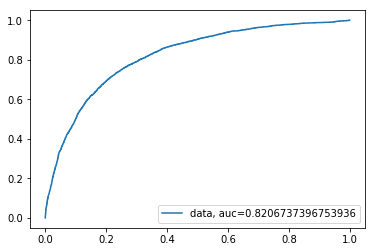

0.0001 25000
Train Accuracy :0.7945409093980137



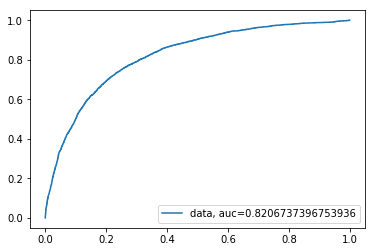

0.001 10000
Train Accuracy :0.7945409093980137



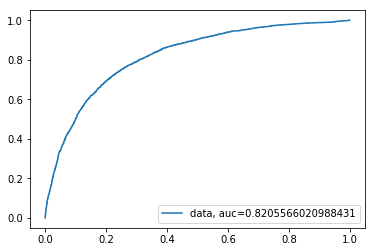

0.001 25000
Train Accuracy :0.7945409093980137



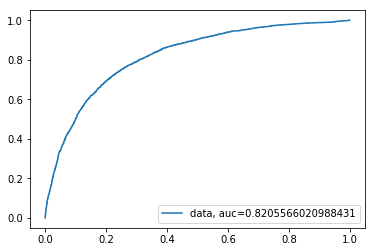

0.01 10000
Train Accuracy :0.7947435984055131



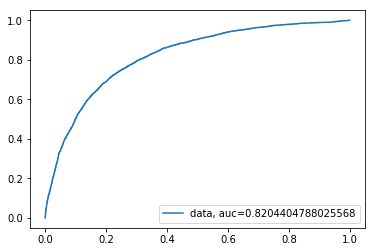

0.01 25000
Train Accuracy :0.7947435984055131



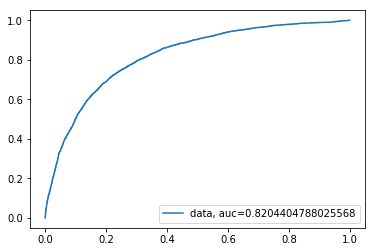

In [161]:
for tl in tol:
    for itr in max_iter:
        logisticRegr = LogisticRegression(tol = tl, max_iter = itr)
        print(logisticRegr.tol, logisticRegr.max_iter)
        logisticRegr.fit(X_train, y_train) 
#         predictions = logisticRegr.predict(X_val) 
        score = logisticRegr.score(X_train, y_train)
        print("Train Accuracy :" + str(score) + "\n")
        y_pred_proba = logisticRegr.predict_proba(X_train)[::,1]
        fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)
        auc = metrics.roc_auc_score(y_train, y_pred_proba)
        plt.plot(fpr,tpr,label="data, auc="+str(auc))
        plt.legend(loc=4)
        plt.show()

### PART 3

0.0001 10000
Accuracy :0.748074584515606



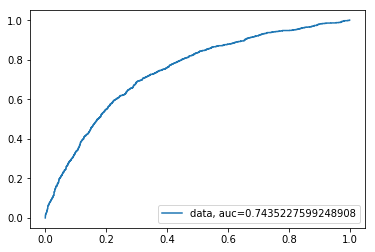

0.0001 25000
Accuracy :0.748074584515606



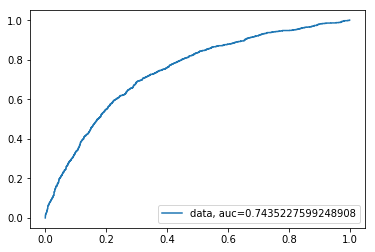

0.001 10000
Accuracy :0.7482772598297527



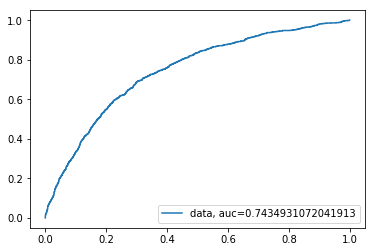

0.001 25000
Accuracy :0.7482772598297527



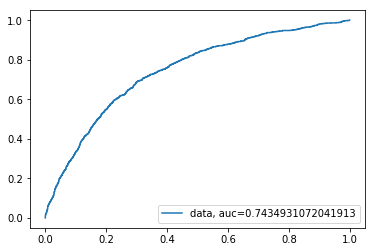

0.01 10000
Accuracy :0.7482772598297527



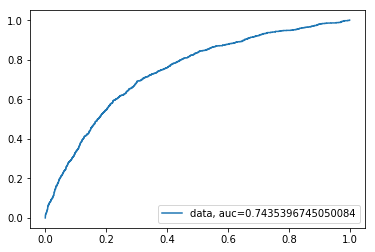

0.01 25000
Accuracy :0.7482772598297527



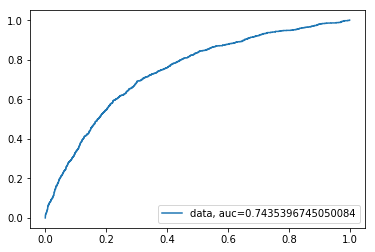

In [170]:
# Step 1 - 
data= pd.read_csv("energydata_complete.csv")
X = data[['RH_4','RH_out','Visibility', 'T_out', 'T8', 'lights', 'T9', 'Press_mm_hg', 'RH_7','Windspeed']]
y = data['Appliances']


tol = [0.0001, 0.001, 0.01]
max_iter = [10000, 25000]


y_threshold = np.mean(y)
j = 0
y_logy = np.zeros((y.shape[0], 1))

for i in y:
    if i < y_threshold:
        y_logy[j] = 0
    else:
        y_logy[j] = 1
        
    j+=1    
        

# Partition the dataset in train + validation sets
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y_logy, test_size = 0.25, random_state = 5)

from sklearn.linear_model import LogisticRegression


for tl in tol:
    for itr in max_iter:
        logisticRegr = LogisticRegression(tol = tl, max_iter = itr)
        print(logisticRegr.tol, logisticRegr.max_iter)
        logisticRegr.fit(X_train, y_train) 
        predictions = logisticRegr.predict(X_val) 
        score = logisticRegr.score(X_val, y_val)
        print("Accuracy :" + str(score) + "\n")
        y_pred_proba = logisticRegr.predict_proba(X_val)[::,1]
        fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_proba)
        auc = metrics.roc_auc_score(y_val, y_pred_proba)
        plt.plot(fpr,tpr,label="data, auc="+str(auc))
        plt.legend(loc=4)
        plt.show()


#### TRAIN ERROR

0.0001 10000
Train Accuracy :0.7545436119181136



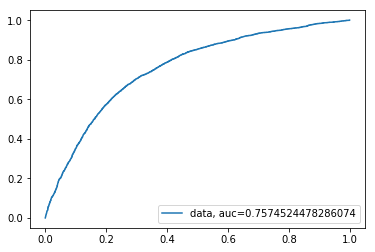

0.0001 25000
Train Accuracy :0.7545436119181136



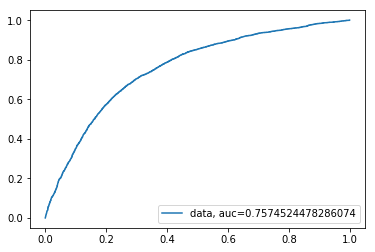

0.001 10000
Train Accuracy :0.7546787379231134



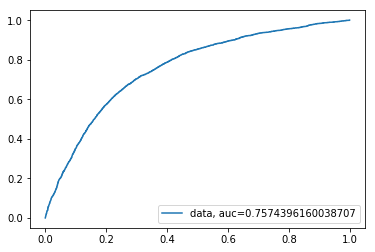

0.001 25000
Train Accuracy :0.7546787379231134



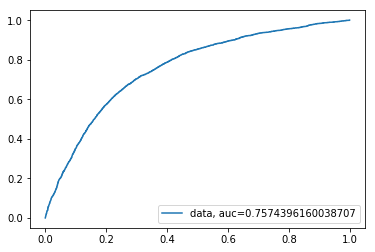

0.01 10000
Train Accuracy :0.7550841159381123



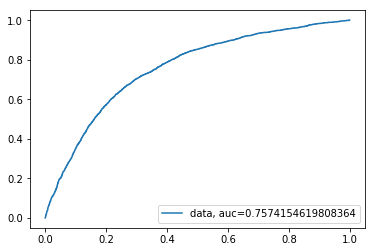

0.01 25000
Train Accuracy :0.7550841159381123



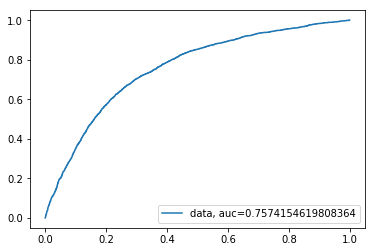

In [171]:
for tl in tol:
    for itr in max_iter:
        logisticRegr = LogisticRegression(tol = tl, max_iter = itr)
        print(logisticRegr.tol, logisticRegr.max_iter)
        logisticRegr.fit(X_train, y_train) 
#         predictions = logisticRegr.predict(X_val) 
        score = logisticRegr.score(X_train, y_train)
        print("Train Accuracy :" + str(score) + "\n")
        y_pred_proba = logisticRegr.predict_proba(X_train)[::,1]
        fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)
        auc = metrics.roc_auc_score(y_train, y_pred_proba)
        plt.plot(fpr,tpr,label="data, auc="+str(auc))
        plt.legend(loc=4)
        plt.show()

#### PART 4

0.0001 10000
Accuracy :0.7486826104580462



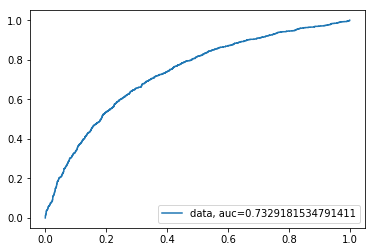

0.0001 25000
Accuracy :0.7486826104580462



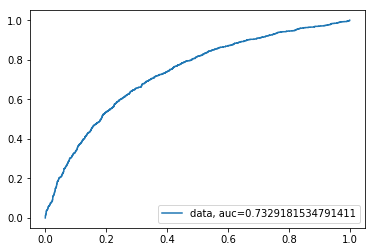

0.001 10000
Accuracy :0.7484799351438994



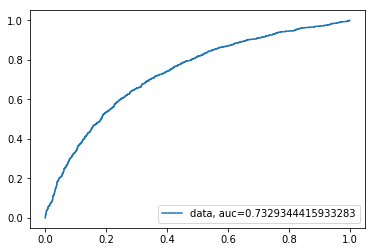

0.001 25000
Accuracy :0.7484799351438994



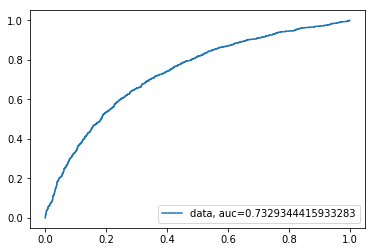

0.01 10000
Accuracy :0.7488852857721929



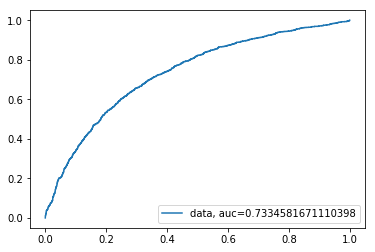

0.01 25000
Accuracy :0.7488852857721929



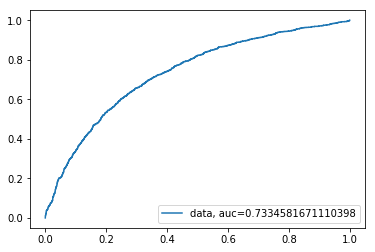

In [168]:
# Step 1 - 
data= pd.read_csv("energydata_complete.csv")
X = data[["T2",
"T6",
"RH_3",
"Windspeed",
"RH_1",
"T3",
"T1",
"T4",
"T8",
"lights"
]]
y = data['Appliances']


tol = [0.0001, 0.001, 0.01]
max_iter = [10000, 25000]


y_threshold = np.mean(y)
j = 0
y_logy = np.zeros((y.shape[0], 1))

for i in y:
    if i < y_threshold:
        y_logy[j] = 0
    else:
        y_logy[j] = 1
        
    j+=1    
        

# Partition the dataset in train + validation sets
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y_logy, test_size = 0.25, random_state = 5)

from sklearn.linear_model import LogisticRegression


for tl in tol:
    for itr in max_iter:
        logisticRegr = LogisticRegression(tol = tl, max_iter = itr)
        print(logisticRegr.tol, logisticRegr.max_iter)
        logisticRegr.fit(X_train, y_train) 
        predictions = logisticRegr.predict(X_val) 
        score = logisticRegr.score(X_val, y_val)
        print("Accuracy :" + str(score) + "\n")
        y_pred_proba = logisticRegr.predict_proba(X_val)[::,1]
        fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_proba)
        auc = metrics.roc_auc_score(y_val, y_pred_proba)
        plt.plot(fpr,tpr,label="data, auc="+str(auc))
        plt.legend(loc=4)
        plt.show()


0.0001 10000
Train Accuracy :0.758394703060604



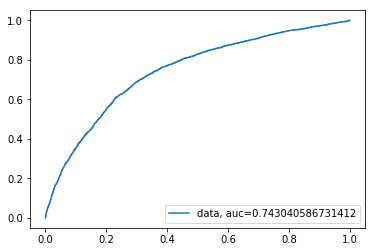

0.0001 25000
Train Accuracy :0.758394703060604



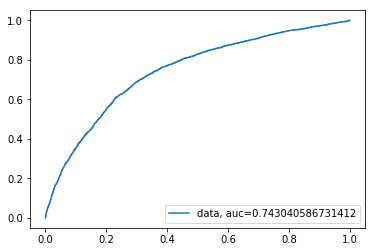

0.001 10000
Train Accuracy :0.7581920140531045



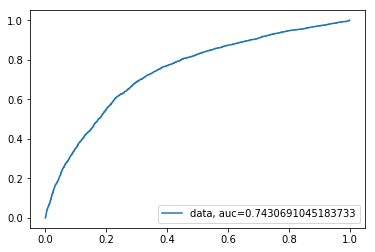

0.001 25000
Train Accuracy :0.7581920140531045



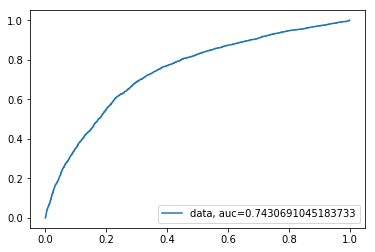

0.01 10000
Train Accuracy :0.7574488210256064



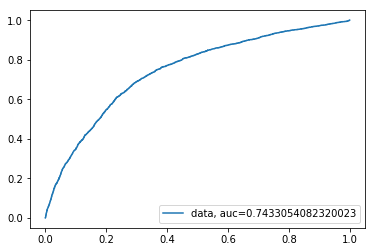

0.01 25000
Train Accuracy :0.7574488210256064



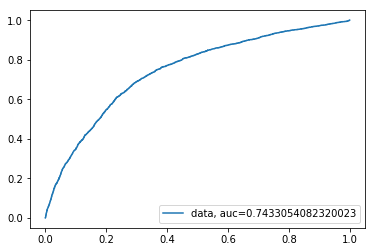

In [169]:
for tl in tol:
    for itr in max_iter:
        logisticRegr = LogisticRegression(tol = tl, max_iter = itr)
        print(logisticRegr.tol, logisticRegr.max_iter)
        logisticRegr.fit(X_train, y_train) 
#         predictions = logisticRegr.predict(X_val) 
        score = logisticRegr.score(X_train, y_train)
        print("Train Accuracy :" + str(score) + "\n")
        y_pred_proba = logisticRegr.predict_proba(X_train)[::,1]
        fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)
        auc = metrics.roc_auc_score(y_train, y_pred_proba)
        plt.plot(fpr,tpr,label="data, auc="+str(auc))
        plt.legend(loc=4)
        plt.show()